In [47]:
from __future__ import print_function
import cobra
import cobra.test
from os.path import join
cobra.DictList

#iRhto1108N_model with biomass as objective
iRhto1108N_model = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2 = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2.objective = "PDAGATpc_rm"

In [48]:
import pandas as pd 
import numpy as np
#import media information
#column 0 is name of exchange reaction, column 1 is upperbound in mM/h/gwd
YNBWAAAS = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS = YNBWAAAS.to_numpy()
media_without_ynb = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'media without ynb', header = None)
media_without_ynb = media_without_ynb.to_numpy()

print(YNBWAAAS)
print(media_without_ynb)
#initialize medium storage
test_medium = []


[['EX_so4_e' 0.217]
 ['EX_mg2_e' 0.868]
 ['EX_ca2_e' 0.104]
 ['EX_pi_e' 0.439]]
[['EX_glc__D_e' 4.63 4.63 4.63]
 ['EX_nh4_e' 4.75 0.238 0.159]
 ['EX_cl_e' 4.99 0.475 0.397]
 ['EX_na1_e' 2.26 2.26 2.26]
 ['EX_k_e' 6.27 6.27 6.27]]


In [58]:
#Original growth rate and TAG production using the given medium without acetate
growth = 0
growth2 = 0
with iRhto1108N_model:
    medium = iRhto1108N_model.medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][1]
    iRhto1108N_model.medium = medium
    test_medium.append(medium.copy())
    growth = iRhto1108N_model.slim_optimize()
    
with iRhto1108N_model2:
    medium = test_medium[0].copy()
    iRhto1108N_model2.medium = medium
    growth2 = iRhto1108N_model2.slim_optimize()
print(growth)
print(growth2)

0.34735658793150126
0.4389999999999491


In [70]:
#glucose and acetate
CN_5_a = np.zeros((2,100))
CN_100_a = np.zeros((2,100))
CN_150_a = np.zeros((2,100))

with iRhto1108N_model:
    medium = test_medium[0].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_5_a[0][k] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = iRhto1108N_model.medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][2]
    test_medium.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_100_a[0][k] = iRhto1108N_model.slim_optimize()
        
with iRhto1108N_model:
    medium = iRhto1108N_model.medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb[j][0]] = media_without_ynb[j][3]
    test_medium.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*100/100
        iRhto1108N_model.medium = medium
        CN_150_a[0][k] = iRhto1108N_model.slim_optimize()

        
        
        
# TAG production for YPD+A


with iRhto1108N_model2:
    medium = test_medium[0].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*100
        iRhto1108N_model2.medium = medium
        CN_5_a[1][k] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    medium = test_medium[1].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*100
        iRhto1108N_model2.medium = medium
        CN_100_a[1][k] = iRhto1108N_model2.slim_optimize()
        
with iRhto1108N_model2:
    medium = test_medium[2].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*100
        iRhto1108N_model2.medium = medium
        CN_150_a[1][k] = iRhto1108N_model2.slim_optimize()


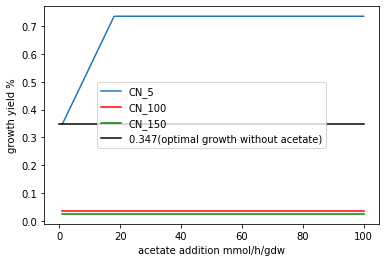

In [51]:
import matplotlib
import matplotlib.pyplot as plt
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_a[0], label = "CN_5")
plt.plot(ace_x, CN_100_a[0], color = "red", label = "CN_100")
plt.plot(ace_x, CN_150_a[0], color = "green", label = "CN_150")
x_coordinates = [0, 100]
y_coordinates = [0.347, 0.347]
plt.plot(x_coordinates, y_coordinates, color = "black", label = "0.347(optimal growth without acetate)")
plt.xlabel("acetate addition mmol/h/gdw")
plt.ylabel("growth yield %")
plt.legend()

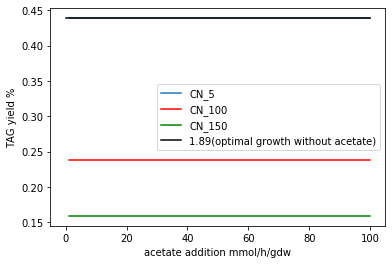

In [71]:
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_a[1], label = "CN_5")
plt.plot(ace_x, CN_100_a[1], color = "red", label = "CN_100")
plt.plot(ace_x, CN_150_a[1], color = "green", label = "CN_150")
x_coordinates = [0, 100]
y_coordinates = [growth2, growth2]
plt.plot(x_coordinates, y_coordinates, color = "black", label = "1.89(optimal growth without acetate)")
plt.xlabel("acetate addition mmol/h/gdw")
plt.ylabel("TAG yield %")
plt.legend()

In [53]:
# Comparison between YPD and YPA under the control of mmol/h/cdw equivalent to 4.63 mmol/h/gDW of glucose

CN_5_d = np.zeros((2,100))
CN_5_oa = np.zeros((2,100))

#import acetate only medium
#Note that glucose here is still not zero
YNBWAAAS_a = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS_a = YNBWAAAS_a.to_numpy()
media_without_ynb_a = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPA.xlsx", 'media without ynb', header = None)
media_without_ynb_a = media_without_ynb_a.to_numpy()

test_medium_a = []

In [68]:
#Comparison between YPD and YPA on growth rate
with iRhto1108N_model:
    medium = test_medium[0].copy()
    medium["EX_glc__D_e"] = 0
    for k in range(100):
        medium["EX_glc__D_e"] = k*4.63/100
        iRhto1108N_model.medium = medium
        CN_5_d[0][k] = iRhto1108N_model.slim_optimize()

with iRhto1108N_model:
    medium = iRhto1108N_model.medium.copy()
    for i in range(len(YNBWAAAS)):
        medium[YNBWAAAS_a[i][0]] = YNBWAAAS_a[i][1]
    for j in range(len(media_without_ynb)):
        medium[media_without_ynb_a[j][0]] = media_without_ynb_a[j][1]
    
    #Remember to set glucose to zero
    
    medium["EX_glc__D_e"] = 0
    test_medium_a.append(medium.copy())
    for k in range(100):
        medium["EX_ac_e"] = k*13.89/100
        iRhto1108N_model.medium = medium
        CN_5_oa[0][k] = iRhto1108N_model.slim_optimize()


In [67]:
#Comparison between YPD and YPA on TAG production rate

with iRhto1108N_model2:
    medium = test_medium[0].copy()
    medium["EX_glc__D_e"] = 0
    for k in range(100):
        medium["EX_glc__D_e"] = k*4.63/100
        iRhto1108N_model2.medium = medium
        CN_5_d[1][k] = iRhto1108N_model2.slim_optimize()

with iRhto1108N_model2:
    medium = test_medium_a[0].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*13.89/100
        iRhto1108N_model2.medium = medium
        CN_5_oa[1][k] = iRhto1108N_model2.slim_optimize()


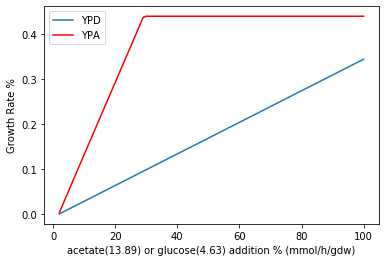

In [56]:
#Visualize of growth rate
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_d[0], label = "YPD")
plt.plot(ace_x, CN_5_oa[0], color = "red", label = "YPA")
#plt.plot(ace_x, CN_150_a[1], color = "green", label = "CN_150")
# x_coordinates = [0, 100]
# y_coordinates = [growth2, growth2]
# plt.plot(x_coordinates, y_coordinates, color = "black", label = "1.89(optimal growth without acetate)")
plt.xlabel("acetate(13.89) or glucose(4.63) addition % (mmol/h/gdw)")
plt.ylabel("Growth Rate %")
plt.legend()

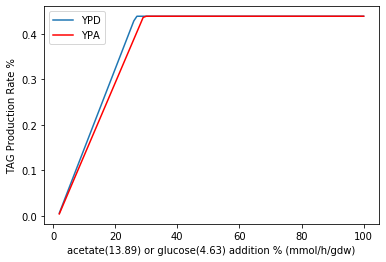

In [69]:
#Visualize of TAG production rate
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, CN_5_d[1], label = "YPD")
plt.plot(ace_x, CN_5_oa[1], color = "red", label = "YPA")
#plt.plot(ace_x, CN_150_a[1], color = "green", label = "CN_150")
# x_coordinates = [0, 100]
# y_coordinates = [growth2, growth2]
# plt.plot(x_coordinates, y_coordinates, color = "black", label = "1.89(optimal growth without acetate)")
plt.xlabel("acetate(13.89) or glucose(4.63) addition % (mmol/h/gdw)")
plt.ylabel("TAG Production Rate %")
plt.legend()